In [2]:
# Step 1: Check versions

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
scipy: 1.7.1
numpy: 1.20.3
matplotlib: 3.4.3
pandas: 1.3.4
sklearn: 0.24.2


In [3]:
# Step 2: Load data

# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
# Load dataset
# names = ['flour-c', 'sugar-c', 'salt-tsp', 'yeast-tsp', 'milk-c', 'water-c', 'oil-c', 'eggs', 'baking-powder-tsp',
#'baking-soda-tsp', 'butter-c', 'label']
df = read_csv('recipe.csv')

# Step 3: Review dataset
# shape
print(df.shape)
# head
print(df.head(20))
# descriptions
print(df.describe())
# class distribution
print(df.groupby('label').size())

(99, 13)
    code   flour-c   sugar-c  salt-tsp  yeast-tsp    milk-c   water-c  \
0    BR1  0.605653  0.067295  0.006057   0.000000  0.000000  0.302826   
1    BR2  0.721154  0.060096  0.004808   0.003606  0.120192  0.030048   
2    BR3  0.671892  0.046659  0.002986   0.005972  0.000000  0.223964   
3    BR4  0.672878  0.000000  0.008282   0.008282  0.000000  0.310559   
4    BR5  0.630193  0.093362  0.001400   0.008963  0.140043  0.000000   
5    BR6  0.592300  0.074038  0.011846   0.005923  0.000000  0.246792   
6    BR7  0.671892  0.055991  0.010078   0.010078  0.000000  0.223964   
7    BR8  0.697269  0.014526  0.005230   0.006973  0.000000  0.261476   
8    BR9  0.686106  0.021441  0.003431   0.010292  0.000000  0.257290   
9   BR10  0.644330  0.071592  0.002864   0.009164  0.143184  0.035796   
10  BR11  0.511312  0.067873  0.006335   0.007240  0.180995  0.090498   
11  BR12  0.685323  0.000000  0.004569   0.010280  0.114220  0.171331   
12  BR13  0.716591  0.031030  0.004137   0

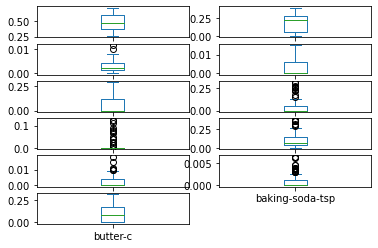

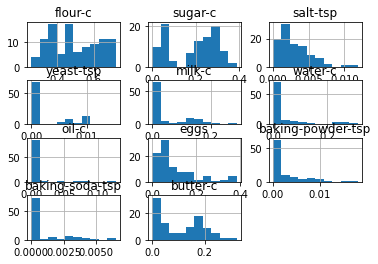

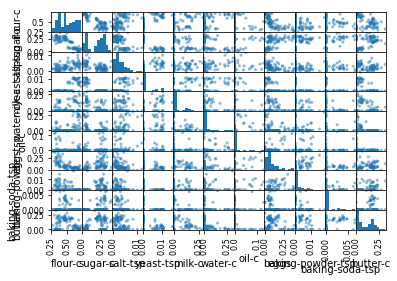

In [9]:
# Step 4: Data visualization

# univariate plots
df.plot(kind='box', subplots=True, layout=(6,2), sharex=False, sharey=False)
pyplot.show()
# histogram
df.hist()
pyplot.show()
# scatter plot matrix
scatter_matrix(df)
pyplot.show()

In [10]:
# Step 5: Evaluate some algorithms

# Split-out validation dataset
array = df.values
X = array[:,1:12]
y = array[:,12]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [11]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto'))) # Support Vector Machines
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.962500 (0.057282)
LDA: 0.975000 (0.050000)
KNN: 0.975000 (0.050000)
CART: 0.912500 (0.057282)
NB: 0.962500 (0.057282)
SVM: 0.378571 (0.048445)


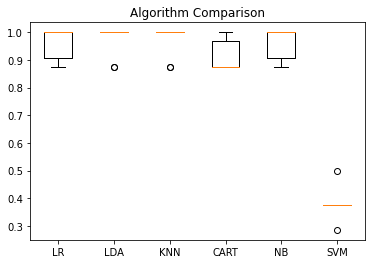

In [12]:
# Compare algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [13]:
# Step 6: Make predictions

# Make predictions on validation dataset
model = LinearDiscriminantAnalysis(solver='lsqr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[4 0 0]
 [0 7 0]
 [0 0 9]]
              precision    recall  f1-score   support

       bread       1.00      1.00      1.00         4
        cake       1.00      1.00      1.00         7
      cookie       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

